
# DBSCAN clustering algorithm


#### Annisa Gita Asmara 
14116027




In [60]:
from matplotlib.colors import LogNorm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [61]:
# Load iris
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= iris_data['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [62]:
# delete kelas target - class target tidak terlalu penting untuk clustering
del iris_df["target"]

In [63]:
# look
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


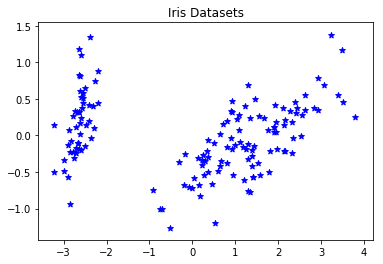

In [64]:
# praprosesing
# menampilkan data untuk eksplorasi
def plot_initial(df, title): 
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    for i in range(0, pca_2d.shape[0]):
        c = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    pl.title(title)
    pl.show()

plot_initial(iris_df, "Iris Datasets")

In [156]:
def plot_cluster(df, model_labels, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(model_labels))
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', '*']
    clusters = [None] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(model_labels[i])
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            legends.append('Cluster ' + str(i))
    pl.legend(clusters, legends)
    pl.title('DBSCAN finds 2 clusters and noise')
    pl.show()

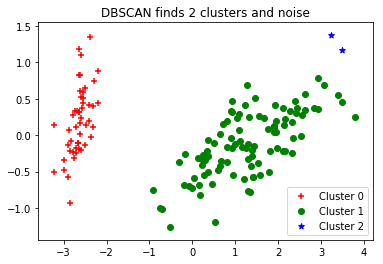

In [157]:
# modeling
iris_db = DBSCAN(eps=0.8, min_samples=0.1).fit(iris_df)
iris_db.labels_
plot_cluster(iris_df, iris_db.labels_, "DB SCAN")

In [158]:
#save model
joblib.dump(db, 'db.pkl')
print("DB models saved")

DB models saved


In [159]:
#load model
iris_db_loaded = joblib.load('db.pkl')

In [168]:
#testing
iris_new = {
    'sepal length (cm)': [5.4], 
    'sepal width (cm)' : [3.7], 
    'petal length (cm)': [1.5], 
    'petal width (cm)' : [0.2] 
}
iris_new_df = pd.DataFrame(data=iris_new)
iris_new_df_c = pd.concat([iris_df, iris_new_df])
iris_db.predict(iris_df, iris_new_df)

AttributeError: 'DBSCAN' object has no attribute 'predict'